# **LINEAR REGRESSION**

1. Forecasting is perhaps the most common application of machine learning in the real world.
2. Time series forecasting is a broad field with a long history. The basic object of forecasting is the time series, which is a set of observations recorded over time. In forecasting applications, the observations are typically recorded with a regular frequency, like daily or monthly.
3. The linear regression algorithm learns how to make a weighted sum from its input features with function: _target = weight_1 * feature_1 + weight_2 * feature_2 + bias_
4. There are two kinds of features unique to time series: time-step features and lag features. 
  1. **Time-step features are features we can derive directly from the time index.** The most basic time-step feature is the time dummy, which counts off time steps in the series from beginning to end (target = weight * time + bias). 
  2. **To make a lag feature we shift the observations of the target series so that they appear to have occured later in time.** Here we've created a 1-step lag feature, though shifting by multiple steps is possible too (target = weight * lag + bias).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
# preparing dataset
book_sales = pd.read_csv("book_sales.csv")
ar = pd.read_csv("ar.csv")
store_sales = pd.read_csv("store_sales.csv")
average_sales = store_sales.groupby('date').mean()['sales']

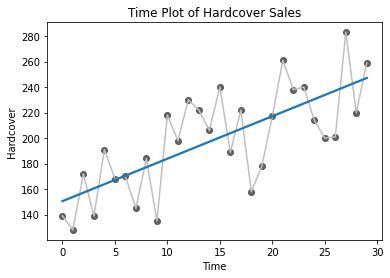

In [6]:
# 1. explanation target = weight * feature + bias
fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=book_sales, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=book_sales,
                 ci = None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

## **NOTED**

The interpret linear regression with the time dummy (Hardcover = 3.33 * Time + 150.5). A change of 6 steps in Time corresponds to an average change of 6 * 3.33 = 19.98 in Hardcover sales.

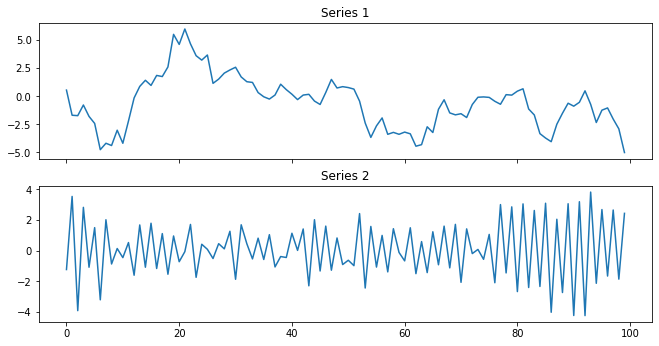

In [17]:
# 2. Linear regression with a lag feature
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 5.5), sharex=True)
ax1.plot(ar['ar1'])
ax1.set_title('Series 1')
ax2.plot(ar['ar2'])
ax2.set_title('Series 2');

## **NOTED**

The interpret linear regression with a lag feature with function (target = 0.95 * lag_1 + error and target = -0.95 * lag_1 + error)

In [34]:
# 3. Fit a time step feature
df = average_sales.to_frame()

# time dummy
time = np.arange(len(df.index))
df['time'] = time

# splitting data
X = df.drop(['sales'], 1)
y = df.sales

# train a model
model = LinearRegression()
model.fit(X, y)

# fitting prediction
y_pred = pd.Series(model.predict(X), index=X.index)

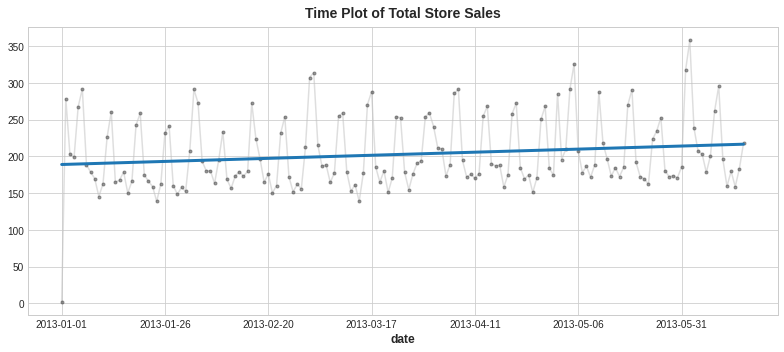

In [35]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

In [30]:
# 4. fit a lag feature to store sales
df = average_sales.to_frame()

# lag
lag_1 = df['sales'].shift(1)
df['lag_1'] = lag_1

X = df.loc[:, ['lag_1']].dropna() 
y = df.loc[:, 'sales']
y, X = y.align(X, join='inner') # drop corresponding

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

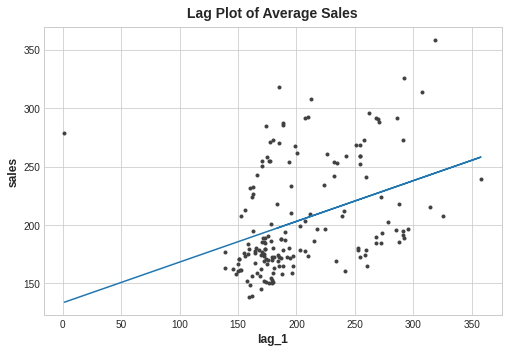

In [33]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');

# **TREND**

1. The trend component of a time series represents a persistent, long-term change in the mean of the series. The trend is the slowest-moving part of a series, the part representing the largest time scale of importance. In a time series of product sales, an increasing trend might be the effect of a market expansion as more people become aware of the product year by year.
2. To see what kind of trend a time series might have, we can use a moving average plot. To compute a moving average of a time series, we compute the average of the values within a sliding window of some defined width. 
3. We've already seen how using the time dummy itself will model a linear trend: target = a * time + b

In [32]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)